In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Sampled complexes

In [2]:
sampled_ifn = "../dat/xcms_mod.sampled.csv"

In [3]:
sampled_df = pd.read_csv(sampled_ifn)

In [4]:
sampled_df.head(2)

,TM-score,Tc,num_binding_res,num_lig_atoms,ps_score,ps_score_pval,pval,query,query_lig_atom_num,query_res,rmsd,seq_identity,tc_times_ps,template,template_lig_atom_num,template_res,xcms
0,0.53570,0.769231,13.0,20.0,0.30323,0.7701,0.002061,BDB50026332-000-T1690-1ri2A00.mod.pdb,"[2, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18...","[118, 140, 122, 121, 120, 186, 146, 142, 170, ...",3.67,0.087,0.233254,a2/3a26_MTA_A_1.pdb,"[16, 9, 7, 1, 3, 5, 2, 18, 12, 17, 19, 13, 8, ...","[19, 22, 26, 28, 29, 143, 222, 224, 243, 244, ...",0.143313
1,0.55668,0.514286,15.0,18.0,0.27881,0.9420,0.000004,BDB50026332-000-T1690-1ri2A00.mod.pdb,"[2, 3, 4, 9, 10, 12, 13, 14, 15, 16, 18, 19, 2...","[87, 109, 108, 134, 133, 195, 196, 89, 64, 136...",3.19,0.105,0.143388,a4/3a4t_SFG_A_1.pdb,"[23, 14, 16, 10, 12, 25, 19, 24, 26, 20, 13, 1...","[8, 19, 22, 23, 26, 143, 144, 192, 196, 222, 2...",-0.214619


In [5]:
print("{} out of 500 samples found templates".format(sampled_df['query'].unique().size))

384 out of 500 samples found templates


### Explore the ps-score

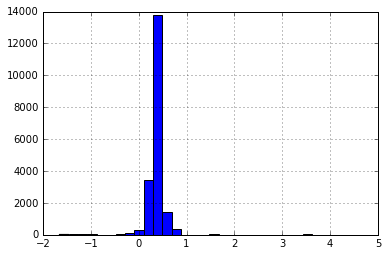

In [6]:
sampled_df.ps_score.hist(bins=30)

In [7]:
ps_outliers = sampled_df[(sampled_df.ps_score > 1) | (sampled_df.ps_score < 0)]

In [8]:
print("{} out of {} templates have ps_socre > 1 or < 0".format(ps_outliers.shape[0], sampled_df.shape[0]))

592 out of 19828 templates have ps_socre > 1 or < 0


Remove the ps-score outliers

In [9]:
cleaned_df = sampled_df[(sampled_df.ps_score < 1) & (sampled_df.ps_score > 0)]

In [10]:
print("after cleanning, {} queries reamin\n{} out of {} templates are greater than {}".format(
        cleaned_df['query'].unique().size,
        cleaned_df[cleaned_df['ps_score'] > 0.4].size,
        cleaned_df.size,
        0.4))

after cleanning, 384 queries reamin
48790 out of 327012 templates are greater than 0.4


## Explore the Tc

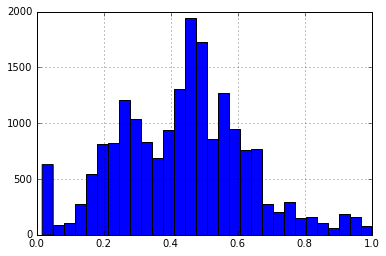

In [11]:
cleaned_df.Tc.hist(bins=30)

## Explore the XCMS

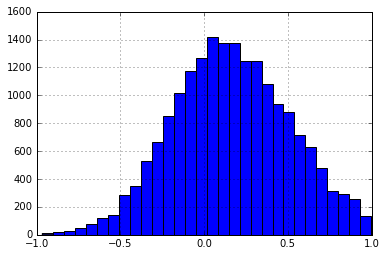

In [12]:
cleaned_df.xcms.hist(bins=30)

## Ranking

### Ranked by ps-score times Tc

In [13]:
def rank(group):
    g = group.sort_values('ps_times_tc', ascending=False)
    return g.iloc[0]

cleaned_df['ps_times_tc'] = cleaned_df.ps_score * cleaned_df.Tc

/Users/eric/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
ranked = cleaned_df.groupby('query').apply(rank)

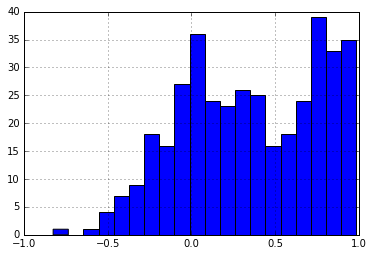

In [15]:
ranked.xcms.hist(bins=20)

### Ranked by ps-score first then Tc

In [16]:
def rank2(group):
    g = group.sort_values(['ps_score', 'Tc'], ascending=False)
    return g.iloc[0]

In [17]:
ranked2 = cleaned_df.groupby('query').apply(rank2)

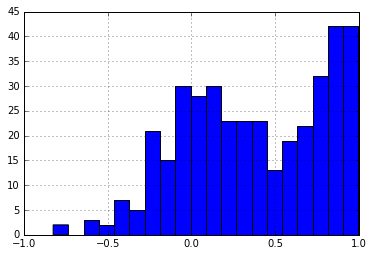

In [18]:
ranked2.xcms.hist(bins=20)

In [19]:
ranked2_pos = ranked2[ranked2.xcms > 0]
print("{} out of {} complexes yield positive xcms value, from which {} has a p-value less than 0.05".format(
        ranked2_pos.shape[0],
        ranked2.shape[0],
        ranked2_pos[ranked2_pos['pval'] < 0.05].shape[0]))

295 out of 384 complexes yield positive xcms value, from which 254 has a p-value less than 0.05
